In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import plotly.express as px

In [3]:
# Load the data with the correct encoding
df = pd.read_csv('d:/ProjectExample/loaddata/opendata_ตัวอย่างข้อมูล_เงินฝากV2.csv', encoding='cp874')

df

,seqnum,sex,province,age,DEP_TOTAL
0,1,ชาย,กรุงเทพมหานคร,168,1043.83
1,2,หญิง,สมุทรสาคร,37,13159.08
2,3,หญิง,บุรีรัมย์,57,31476.22
3,4,หญิง,บุรีรัมย์,73,90.38
4,5,หญิง,บุรีรัมย์,50,14185.05
...,...,...,...,...,...
9995,9996,ชาย,บุรีรัมย์,59,1526.47
9996,9997,หญิง,บุรีรัมย์,51,139.06
9997,9998,หญิง,บุรีรัมย์,37,9535.80
9998,9999,หญิง,บุรีรัมย์,31,120.62


In [4]:
from sklearn.preprocessing import LabelEncoder

# Convert 'sex' column to numerical values
df['sex'] = df['sex'].map({'ชาย': 1, 'หญิง': 0})

# Convert 'province' column to numerical values using label encoding
label_encoder = LabelEncoder()
df['province'] = label_encoder.fit_transform(df['province'])

df

,seqnum,sex,province,age,DEP_TOTAL
0,1,1.0,1,168,1043.83
1,2,0.0,51,37,13159.08
2,3,0.0,24,57,31476.22
3,4,0.0,24,73,90.38
4,5,0.0,24,50,14185.05
...,...,...,...,...,...
9995,9996,1.0,24,59,1526.47
9996,9997,0.0,24,51,139.06
9997,9998,0.0,24,37,9535.80
9998,9999,0.0,24,31,120.62


In [5]:
df = df.dropna()
df = df[df['age'] <= 100]
df

,seqnum,sex,province,age,DEP_TOTAL
1,2,0.0,51,37,13159.08
2,3,0.0,24,57,31476.22
3,4,0.0,24,73,90.38
4,5,0.0,24,50,14185.05
5,6,0.0,24,72,12999.60
...,...,...,...,...,...
9995,9996,1.0,24,59,1526.47
9996,9997,0.0,24,51,139.06
9997,9998,0.0,24,37,9535.80
9998,9999,0.0,24,31,120.62


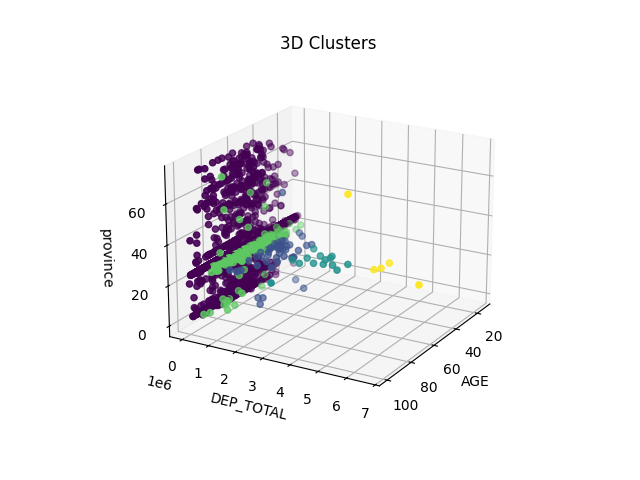

In [6]:
%matplotlib widget



# Select all columns except 'seqnum' for clustering
data_for_clustering = df.drop(columns=['seqnum'])

# Number of clusters
k = 5

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k)

# Fit the model
kmeans.fit(data_for_clustering)

# Get the cluster labels 
labels = kmeans.labels_

# Add the cluster labels to the original data
df['Cluster'] = labels

# Save the clustered data to a new CSV file
df.to_csv('clustered_opendata.csv', index=False)

# Plot the clusters in 3D (assuming 3D data for simplicity)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['age'], df['DEP_TOTAL'], df['province'], c=df['Cluster'], cmap='viridis')
ax.set_xlabel('AGE')
ax.set_ylabel('DEP_TOTAL')
ax.set_zlabel('province')
ax.set_title('3D Clusters')



ax.view_init(elev=20, azim=30)

plt.show()




In [21]:
fig = px.scatter_3d(df, x='age', y='DEP_TOTAL', z='province', color='DEP_TOTAL', title='3D Scatter Plot of Clusters')

fig.update_traces(marker=dict(size=3))

fig.show()